In [1]:
!mkdir ../checkpoints
!wget https://open-mmlab.s3.ap-northeast-2.amazonaws.com/mmsegmentation/models/pspnet/pspnet_r50-d8_512x1024_40k_cityscapes/pspnet_r50-d8_512x1024_40k_cityscapes_20200605_003338-2966598c.pth -P ../checkpoints

mkdir: cannot create directory ‘../checkpoints’: File exists
--2020-07-07 08:54:25--  https://open-mmlab.s3.ap-northeast-2.amazonaws.com/mmsegmentation/models/pspnet/pspnet_r50-d8_512x1024_40k_cityscapes/pspnet_r50-d8_512x1024_40k_cityscapes_20200605_003338-2966598c.pth
Resolving open-mmlab.s3.ap-northeast-2.amazonaws.com (open-mmlab.s3.ap-northeast-2.amazonaws.com)... 52.219.58.55
Connecting to open-mmlab.s3.ap-northeast-2.amazonaws.com (open-mmlab.s3.ap-northeast-2.amazonaws.com)|52.219.58.55|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 196205945 (187M) [application/x-www-form-urlencoded]
Saving to: ‘../checkpoints/pspnet_r50-d8_512x1024_40k_cityscapes_20200605_003338-2966598c.pth.1’

pspnet_r50-d8_512x1 100%[===================>] 187.12M  16.5MB/s    in 13s     

2020-07-07 08:54:38 (14.8 MB/s) - ‘../checkpoints/pspnet_r50-d8_512x1024_40k_cityscapes_20200605_003338-2966598c.pth.1’ saved [196205945/196205945]



In [1]:
from mmseg.apis import init_segmentor, inference_segmentor

/home/jovyan/.venv/torch1.10.0-py3.8-cuda11.3/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(


In [2]:
config_file = '../local_configs/segformer/B0/segformer.b0.448x448.crack.160k.py'
checkpoint_file = '../work_dirs/segformer.b0.448x448.crack.160k/latest.pth'

In [3]:
# build the model from a config file and a checkpoint file
model = init_segmentor(config_file, checkpoint_file, device='cuda:0')

load checkpoint from local path: ../work_dirs/segformer.b0.448x448.crack.160k/latest.pth


In [47]:
# test a single image
img = 'crack_demo.jpg'
img2 = 'crack_demo2.jpg'
img3 = 'crack_demo3.jpg'
img4 = 'crack_demo4.jpg'
joint_img = 'joint.jpg'
# result = inference_segmentor(model, img)
# result2 = inference_segmentor(model, img2)
# result3 = inference_segmentor(model, img3)
# result4 = inference_segmentor(model, img4)
joint_result = inference_segmentor(model, joint_img)

RuntimeError: CUDA out of memory. Tried to allocate 73.21 GiB (GPU 0; 23.69 GiB total capacity; 1.24 GiB already allocated; 12.23 GiB free; 1.26 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF

In [37]:
import matplotlib.pyplot as plt
from PIL import Image

Text(0.5, 1.0, 'both')

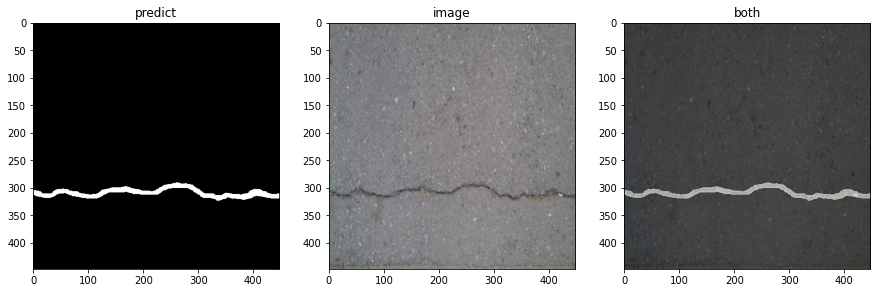

In [45]:
image = Image.open(img)
pred = result[0]
pred = pred * 255
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,15))
ax1.imshow(pred, cmap='Greys_r')
ax1.set_title("predict")
ax2.imshow(image)
ax2.set_title("image")
ax3.imshow(image)
ax3.imshow(pred, cmap='Greys_r', alpha=0.5)
ax3.set_title("both")